### Import libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

**Set style for plots**

In [22]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

**LOAD DATA**

In [23]:
script_dir = Path().absolute()
project_root = script_dir.parent.parent
data_dir = project_root / 'Data'
integrated_dir = data_dir / 'integrated'

df = pd.read_csv(integrated_dir / 'unified_dataset.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

print(f"Data loaded: {len(df)} rows, {len(df.columns)} columns")
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Participants: {df['user_id_clean'].nunique()}")

Data loaded: 713 rows, 31 columns
Date range: 2025-06-29 19:29:27.735000 to 2025-07-15 09:08:29.618000
Participants: 22


#### Data Overview
Check columns, data types, and missing values

In [24]:
print("Data Overview")
print("\nColumns and data types:")
print(df.info())

print("\nMissing values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns: {len(numeric_cols)}")

Data Overview

Columns and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  713 non-null    int64         
 1   user_id             713 non-null    object        
 2   timestamp           713 non-null    datetime64[ns]
 3   survey_index_today  713 non-null    int64         
 4   stress              713 non-null    float64       
 5   tired               713 non-null    float64       
 6   productive          713 non-null    float64       
 7   warm                713 non-null    float64       
 8   mental_demand       713 non-null    float64       
 9   user_id_clean       713 non-null    object        
 10  at_mean_co2         0 non-null      float64       
 11  at_mean_temp        590 non-null    float64       
 12  at_mean_humidity    590 non-null    float64       
 13  at_mean_voc

---

#### Summary Statistics
Get mean, median, min, max for all numeric variables

In [25]:
key_vars = ['stress', 'tired', 'productive', 'warm', 'mental_demand',
            'at_mean_co2', 'at_mean_temp', 'at_mean_humidity',
            'ac_mean_co2', 'ac_mean_temp', 'ac_mean_humidity',
            'accuracy', 'stroop_effect', 'total_fluency']

key_vars = [col for col in key_vars if col in df.columns]

print("Summary Statistics")
print(df[key_vars].describe().round(2))

Summary Statistics
       stress   tired  productive    warm  mental_demand  at_mean_co2  \
count  713.00  713.00      713.00  713.00         713.00          0.0   
mean     3.38    3.71        3.90    3.58           3.86          NaN   
std      1.33    1.50        1.32    1.86           1.49          NaN   
min      1.00    1.00        1.00    1.00           1.00          NaN   
25%      2.00    3.00        3.00    2.00           3.00          NaN   
50%      3.00    4.00        4.00    4.00           4.00          NaN   
75%      5.00    5.00        5.00    5.00           5.00          NaN   
max      7.00    7.00        7.00    7.00           7.00          NaN   

       at_mean_temp  at_mean_humidity  ac_mean_co2  ac_mean_temp  \
count        590.00            590.00       627.00        627.00   
mean          27.06             35.95       500.55         27.00   
std            2.94              7.25       115.17          2.13   
min           19.41             19.12       374.95 

#### Data Quality Check
Check for participants, locations, and data completeness

In [26]:
print("Data Quality Check")
print(f"\nParticipants: {df['user_id_clean'].nunique()}")

if 'ac_location_type' in df.columns:
    print(f"\nLocations: {df['ac_location_type'].value_counts().to_dict()}")

print(f"\nData completeness:")
print(f"AirControl: {(df['ac_mean_co2'].notna()).sum()} / {len(df)}")
print(f"Stroop: {(df['accuracy'].notna()).sum()} / {len(df)}")
print(f"Creative: {(df['total_fluency'].notna()).sum()} / {len(df)}")

Data Quality Check

Participants: 22

Locations: {'work': 368, 'home': 259}

Data completeness:
AirControl: 627 / 713
Stroop: 429 / 713
Creative: 414 / 713


---

#### Distribution Visualizations
Visualize how survey responses and air quality variables are distributed

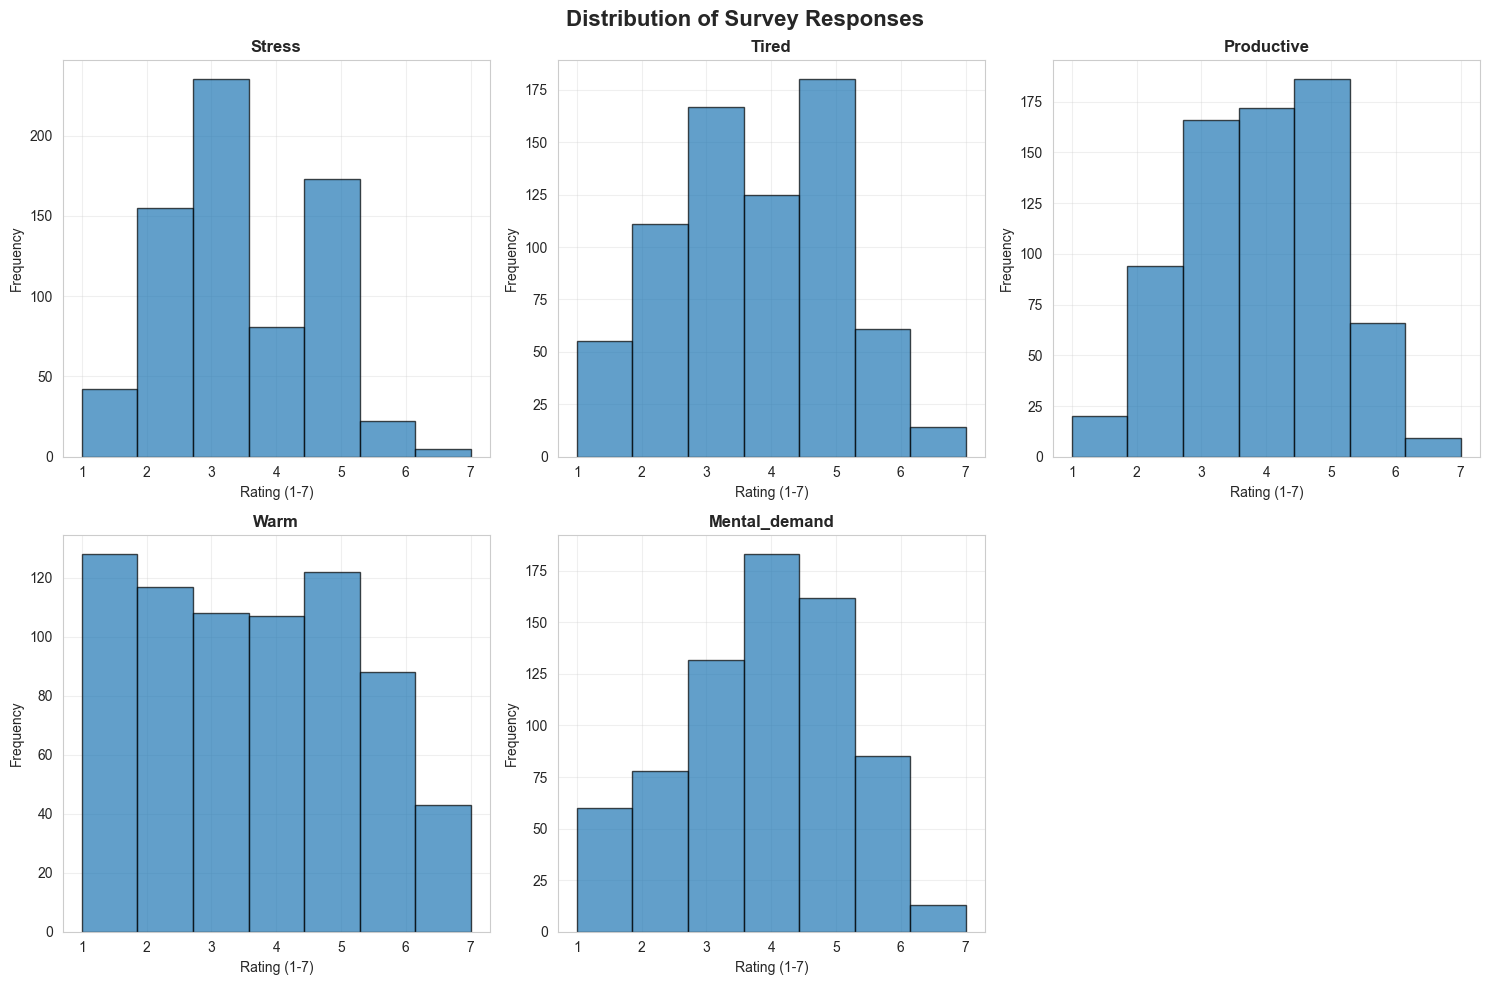

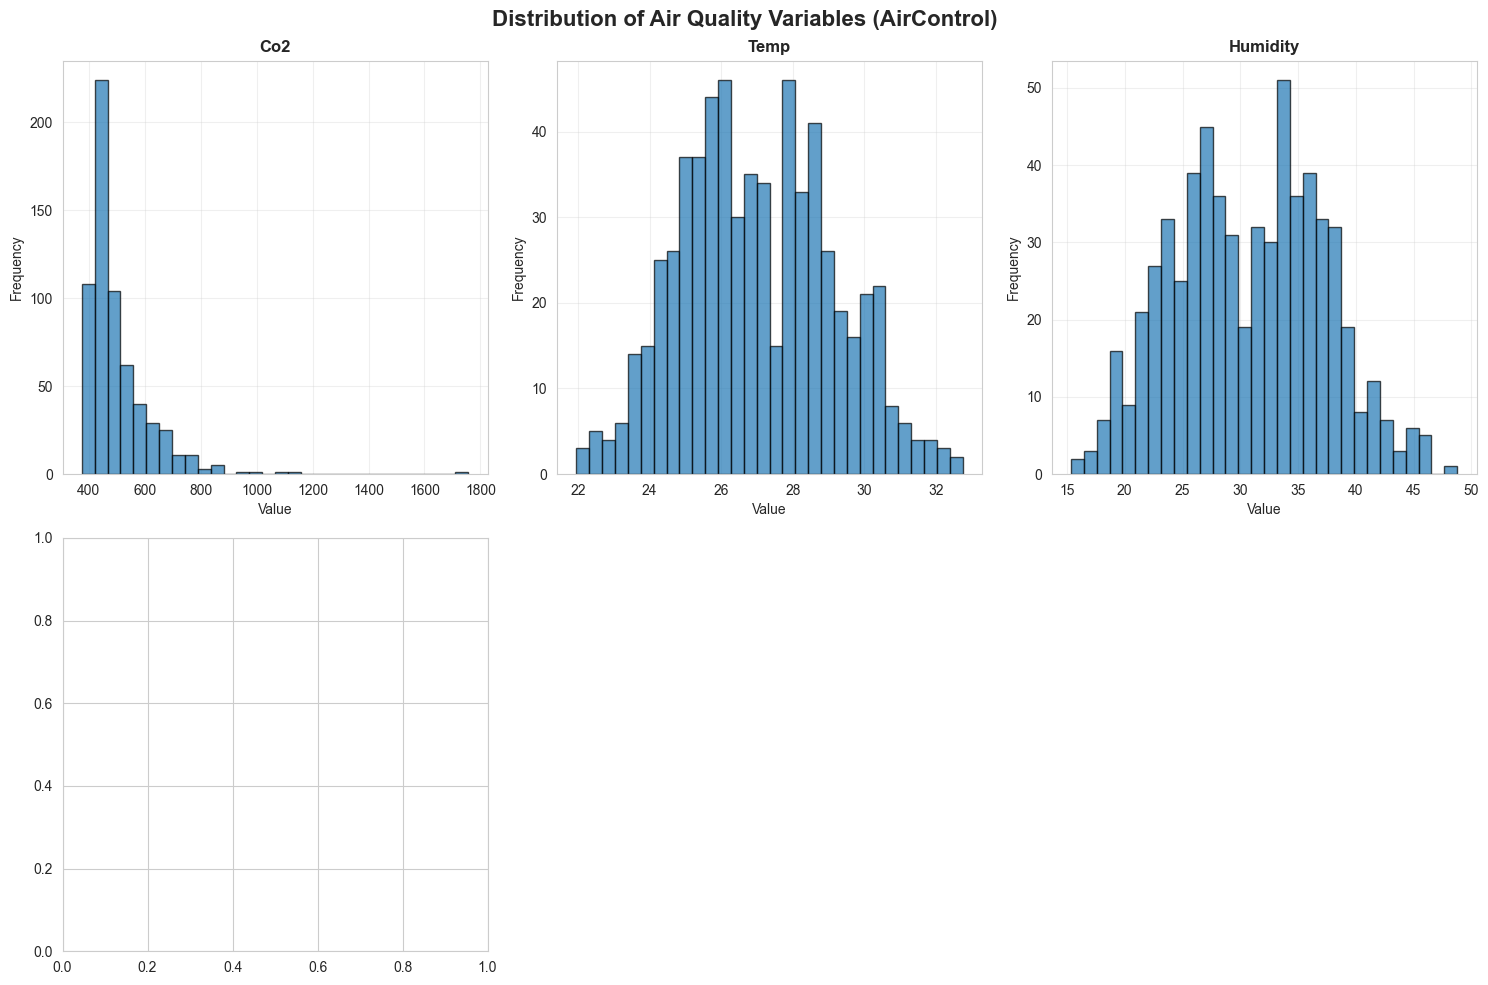

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Survey Responses', fontsize=16, fontweight='bold')

survey_vars = ['stress', 'tired', 'productive', 'warm', 'mental_demand']
for idx, var in enumerate(survey_vars):
    row = idx // 3
    col = idx % 3
    df[var].hist(bins=7, ax=axes[row, col], edgecolor='black', alpha=0.7)
    axes[row, col].set_title(f'{var.capitalize()}', fontweight='bold')
    axes[row, col].set_xlabel('Rating (1-7)')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True, alpha=0.3)

axes[1, 2].remove()
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Air Quality Variables (AirControl)', fontsize=16, fontweight='bold')

air_vars = ['ac_mean_co2', 'ac_mean_temp', 'ac_mean_humidity']
for idx, var in enumerate(air_vars):
    row = idx // 3
    col = idx % 3
    data = df[var].dropna()
    if len(data) > 0:
        data.hist(bins=30, ax=axes[row, col], edgecolor='black', alpha=0.7)
        axes[row, col].set_title(f'{var.replace("ac_mean_", "").capitalize()}', fontweight='bold')
        axes[row, col].set_xlabel('Value')
        axes[row, col].set_ylabel('Frequency')
        axes[row, col].grid(True, alpha=0.3)

axes[1, 1].remove()
axes[1, 2].remove()
plt.tight_layout()
plt.show()

#### Correlation Analysis
Find relationships between air quality and survey responses

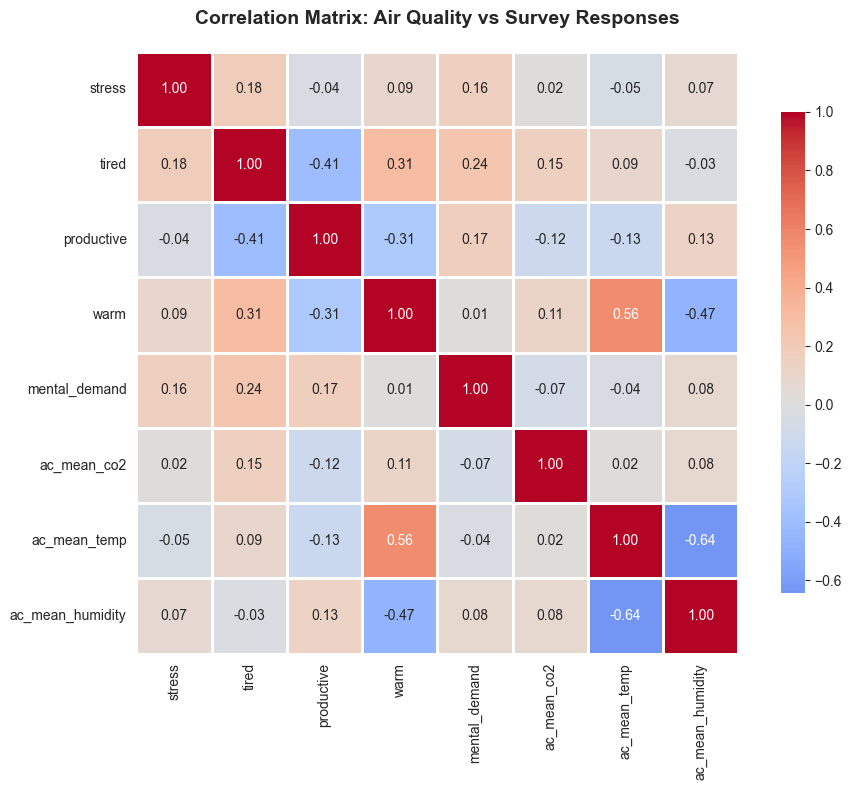

Top correlations (> 0.2):
tired ↔ productive: -0.412
tired ↔ warm: 0.312
tired ↔ mental_demand: 0.242
productive ↔ warm: -0.309
warm ↔ ac_mean_temp: 0.558
warm ↔ ac_mean_humidity: -0.468
ac_mean_temp ↔ ac_mean_humidity: -0.645


In [28]:
corr_vars = ['stress', 'tired', 'productive', 'warm', 'mental_demand',
             'ac_mean_co2', 'ac_mean_temp', 'ac_mean_humidity']

corr_vars = [col for col in corr_vars if col in df.columns]
corr_data = df[corr_vars].dropna()

if len(corr_data) > 0:
    corr_matrix = corr_data.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix: Air Quality vs Survey Responses', 
              fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    print("Top correlations (> 0.2):")
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            val = corr_matrix.iloc[i, j]
            if abs(val) > 0.2:
                print(f"{corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: {val:.3f}")

#### Work vs Home Comparison
Compare air quality and survey responses between work and home locations

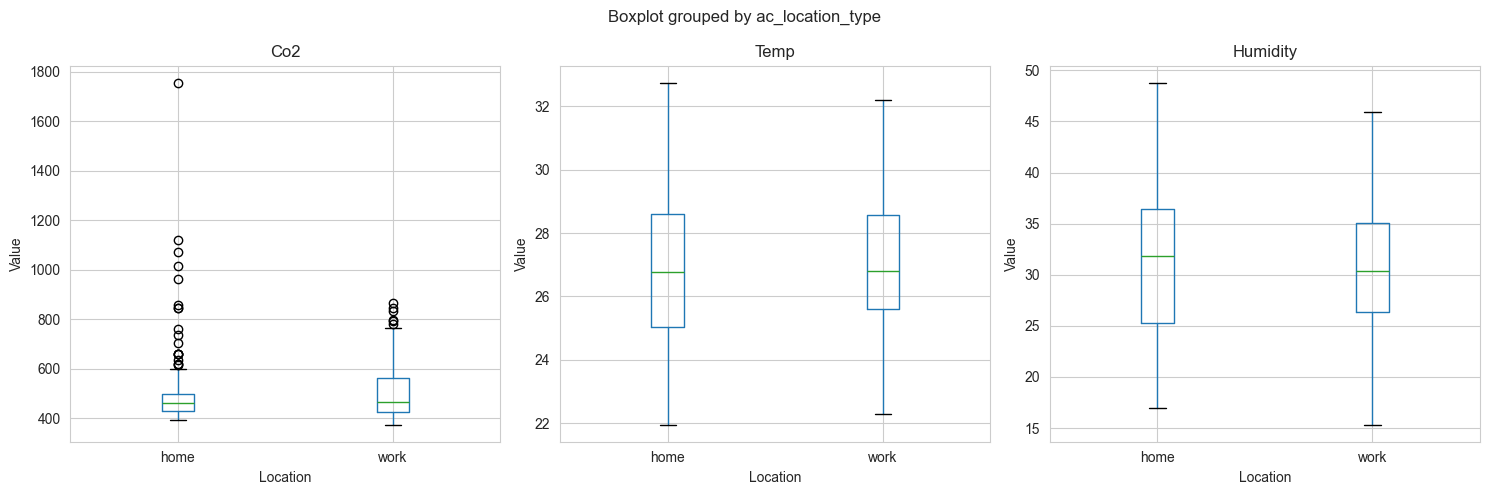

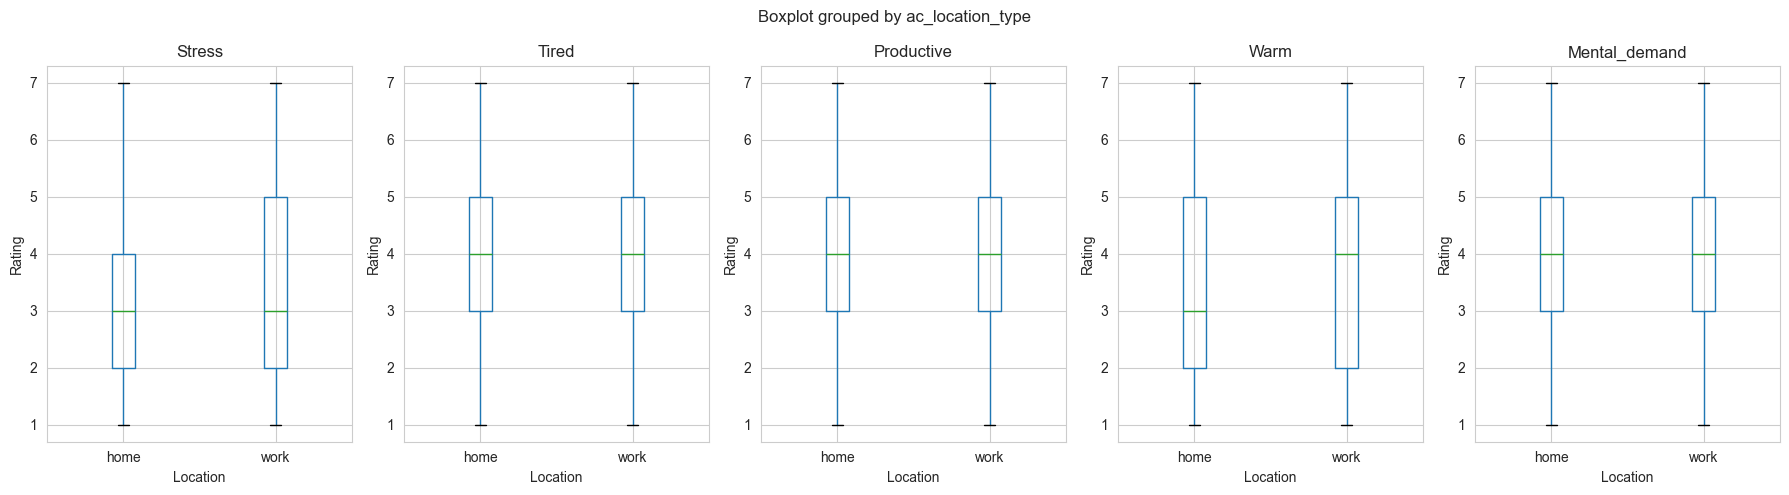

Summary by location:
                  ac_mean_co2  ac_mean_temp  ac_mean_humidity  stress  tired  \
ac_location_type                                                               
home                   492.34         26.92             31.03    3.20   3.77   
work                   506.33         27.06             30.48    3.48   3.66   

                  productive  warm  mental_demand  
ac_location_type                                   
home                    3.99  3.56           4.00  
work                    3.85  3.51           3.81  


In [29]:
location_data = df[df['ac_location_type'].notna()].copy()

if len(location_data) > 0:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Air Quality: Work vs Home', fontsize=14, fontweight='bold')
    
    air_metrics = ['ac_mean_co2', 'ac_mean_temp', 'ac_mean_humidity']
    for idx, metric in enumerate(air_metrics):
        if metric in location_data.columns:
            location_data.boxplot(column=metric, by='ac_location_type', 
                                 ax=axes[idx], grid=True)
            axes[idx].set_title(metric.replace('ac_mean_', '').capitalize())
            axes[idx].set_xlabel('Location')
            axes[idx].set_ylabel('Value')
    
    plt.tight_layout()
    plt.show()
    
    fig, axes = plt.subplots(1, 5, figsize=(18, 5))
    fig.suptitle('Survey Responses: Work vs Home', fontsize=14, fontweight='bold')
    
    survey_metrics = ['stress', 'tired', 'productive', 'warm', 'mental_demand']
    for idx, metric in enumerate(survey_metrics):
        location_data.boxplot(column=metric, by='ac_location_type', 
                              ax=axes[idx], grid=True)
        axes[idx].set_title(metric.capitalize())
        axes[idx].set_xlabel('Location')
        axes[idx].set_ylabel('Rating')
    
    plt.tight_layout()
    plt.show()
    
    summary_cols = ['ac_mean_co2', 'ac_mean_temp', 'ac_mean_humidity',
                    'stress', 'tired', 'productive', 'warm', 'mental_demand']
    summary_cols = [col for col in summary_cols if col in location_data.columns]
    
    print("Summary by location:")
    print(location_data.groupby('ac_location_type')[summary_cols].mean().round(2))

---

#### Time Series Analysis
See how air quality and survey responses change over time

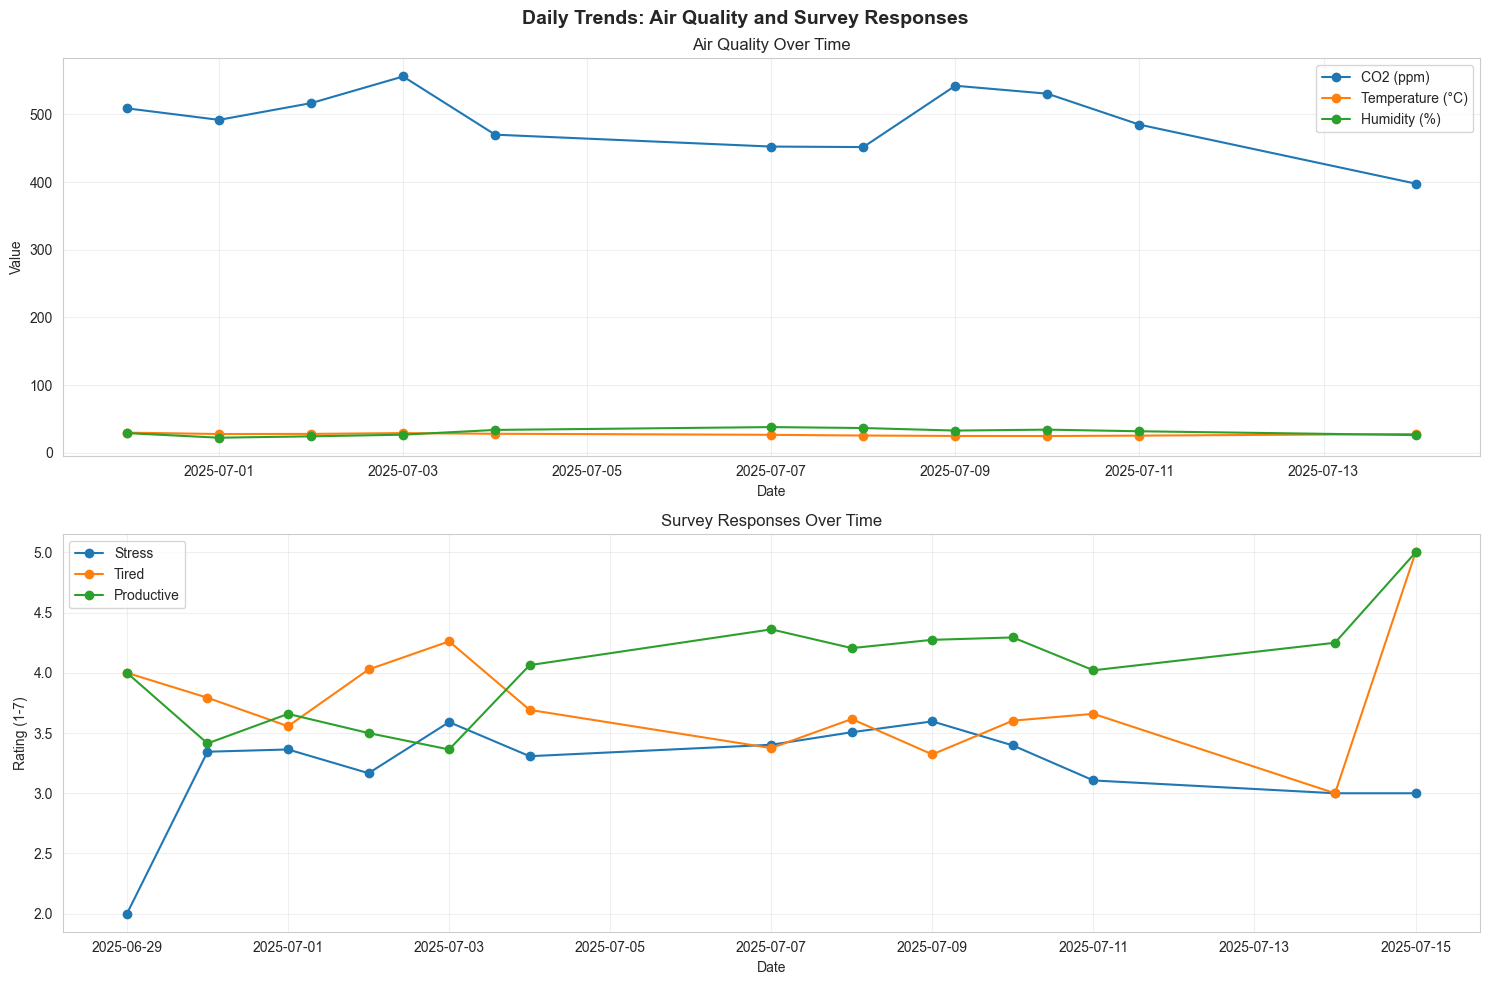

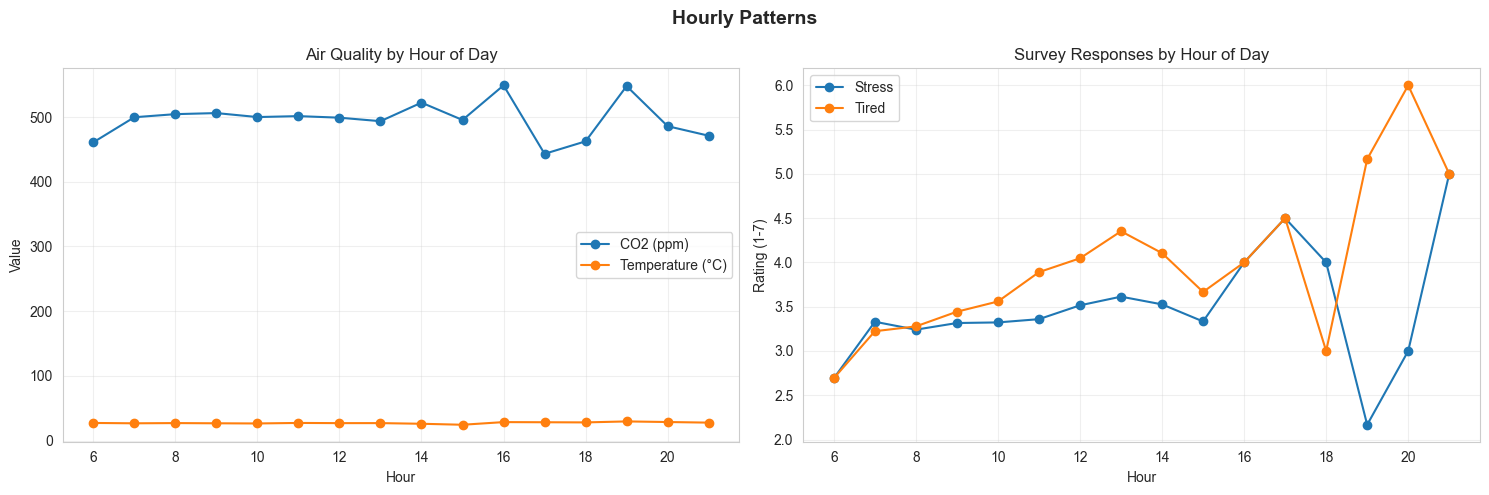

In [30]:
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()

daily_air = df.groupby('date')[['ac_mean_co2', 'ac_mean_temp', 'ac_mean_humidity']].mean()
daily_survey = df.groupby('date')[['stress', 'tired', 'productive']].mean()

fig, axes = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle('Daily Trends: Air Quality and Survey Responses', fontsize=14, fontweight='bold')

daily_air.plot(ax=axes[0], marker='o')
axes[0].set_title('Air Quality Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Value')
axes[0].legend(['CO2 (ppm)', 'Temperature (°C)', 'Humidity (%)'])
axes[0].grid(True, alpha=0.3)

daily_survey.plot(ax=axes[1], marker='o')
axes[1].set_title('Survey Responses Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Rating (1-7)')
axes[1].legend(['Stress', 'Tired', 'Productive'])
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

hourly_data = df.groupby('hour')[['ac_mean_co2', 'ac_mean_temp', 'stress', 'tired']].mean()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Hourly Patterns', fontsize=14, fontweight='bold')

hourly_data[['ac_mean_co2', 'ac_mean_temp']].plot(ax=axes[0], marker='o')
axes[0].set_title('Air Quality by Hour of Day')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Value')
axes[0].legend(['CO2 (ppm)', 'Temperature (°C)'])
axes[0].grid(True, alpha=0.3)

hourly_data[['stress', 'tired']].plot(ax=axes[1], marker='o')
axes[1].set_title('Survey Responses by Hour of Day')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Rating (1-7)')
axes[1].legend(['Stress', 'Tired'])
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### CO₂ Threshold Analysis
Compare survey responses when CO₂ is high vs low

Survey responses by CO2 level:
                   stress  tired  productive  warm  mental_demand
co2_category                                                     
Low (<800)           3.37    3.7        3.91  3.54           3.90
Medium (800-1000)    3.57    4.0        3.43  3.71           3.71
High (>1000)         3.00    3.5        4.75  1.50           3.00


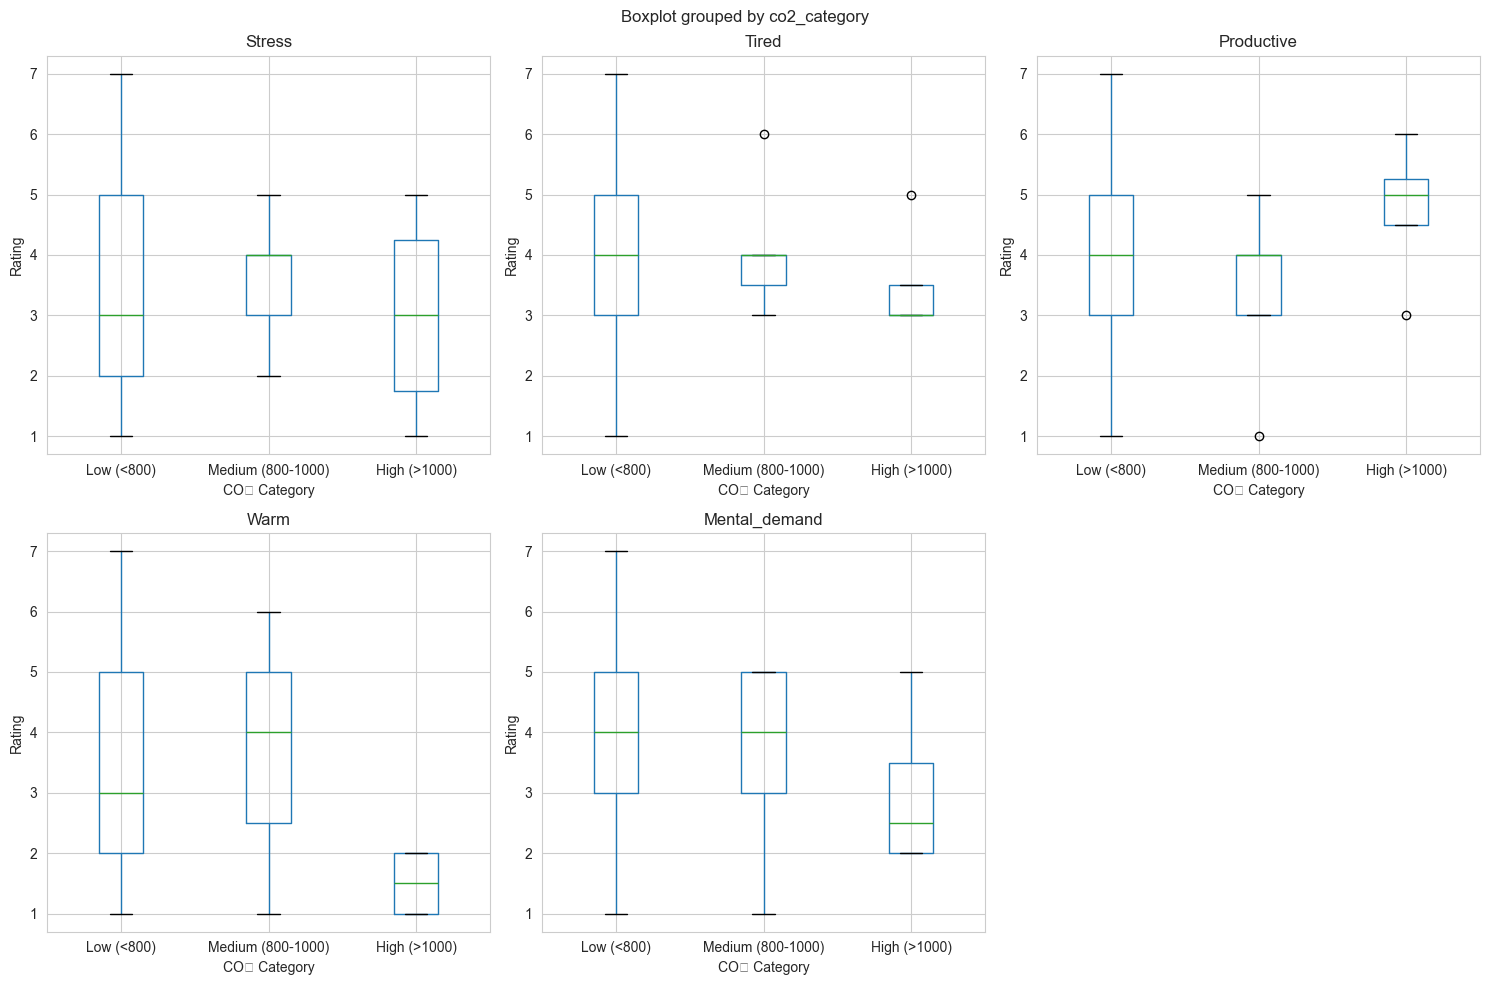


Observations by CO2 category:
co2_category
Low (<800)           616
Medium (800-1000)      7
High (>1000)           4
Name: count, dtype: int64


In [31]:
co2_data = df[df['ac_mean_co2'].notna()].copy()

co2_data['co2_category'] = pd.cut(co2_data['ac_mean_co2'], 
                                   bins=[0, 800, 1000, 2000],
                                   labels=['Low (<800)', 'Medium (800-1000)', 'High (>1000)'])

survey_cols = ['stress', 'tired', 'productive', 'warm', 'mental_demand']
co2_comparison = co2_data.groupby('co2_category')[survey_cols].mean().round(2)
print("Survey responses by CO2 level:")
print(co2_comparison)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Survey Responses by CO₂ Level', fontsize=14, fontweight='bold')

for idx, col in enumerate(survey_cols):
    row = idx // 3
    col_idx = idx % 3
    co2_data.boxplot(column=col, by='co2_category', ax=axes[row, col_idx], grid=True)
    axes[row, col_idx].set_title(col.capitalize())
    axes[row, col_idx].set_xlabel('CO₂ Category')
    axes[row, col_idx].set_ylabel('Rating')

axes[1, 2].remove()
plt.tight_layout()
plt.show()

print("\nObservations by CO2 category:")
print(co2_data['co2_category'].value_counts())


#### Stroop Test Analysis
Analyze cognitive performance from Stroop tests

Stroop tests: 429 (60.2% of surveys)

Summary statistics:
       accuracy  avg_congruent_rt  avg_incongruent_rt  stroop_effect
count   429.000           429.000             429.000        429.000
mean      0.988             0.765               0.787          0.022
std       0.026             0.324               0.266          0.342
min       0.654             0.524               0.541         -4.900
25%       0.972             0.640               0.658         -0.022
50%       1.000             0.705               0.728          0.026
75%       1.000             0.808               0.843          0.073
max       1.000             5.958               4.381          3.684


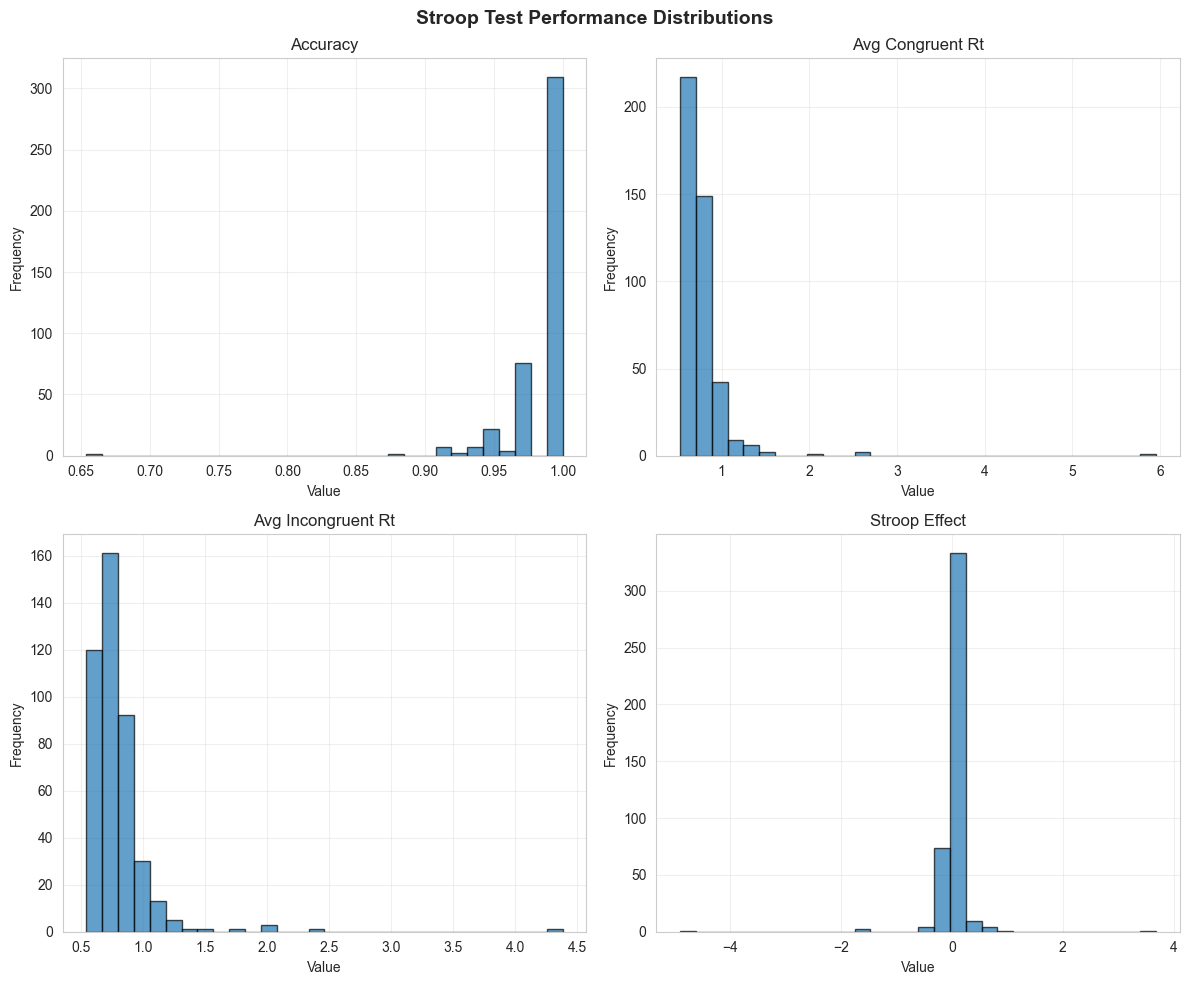


Stroop effect: positive 287, negative 142
Mean Stroop effect: 0.022


In [32]:
stroop_data = df[df['accuracy'].notna()].copy()

if len(stroop_data) > 0:
    print(f"Stroop tests: {len(stroop_data)} ({len(stroop_data)/len(df)*100:.1f}% of surveys)")
    
    stroop_vars = ['accuracy', 'avg_congruent_rt', 'avg_incongruent_rt', 'stroop_effect']
    print("\nSummary statistics:")
    print(stroop_data[stroop_vars].describe().round(3))
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Stroop Test Performance Distributions', fontsize=14, fontweight='bold')
    
    for idx, var in enumerate(stroop_vars):
        row = idx // 2
        col = idx % 2
        data = stroop_data[var].dropna()
        if len(data) > 0:
            axes[row, col].hist(data, bins=30, edgecolor='black', alpha=0.7)
            axes[row, col].set_title(var.replace('_', ' ').title())
            axes[row, col].set_xlabel('Value')
            axes[row, col].set_ylabel('Frequency')
            axes[row, col].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    positive_effect = (stroop_data['stroop_effect'] > 0).sum()
    negative_effect = (stroop_data['stroop_effect'] < 0).sum()
    print(f"\nStroop effect: positive {positive_effect}, negative {negative_effect}")
    print(f"Mean Stroop effect: {stroop_data['stroop_effect'].mean():.3f}")

#### Creative Fluency Analysis
Analyze creative performance from Creative tests

Creative tests: 414 (58.1% of surveys)

Summary statistics:
count    414.00
mean       4.06
std        2.35
min        1.00
25%        2.00
50%        4.00
75%        6.00
max       15.00
Name: total_fluency, dtype: float64


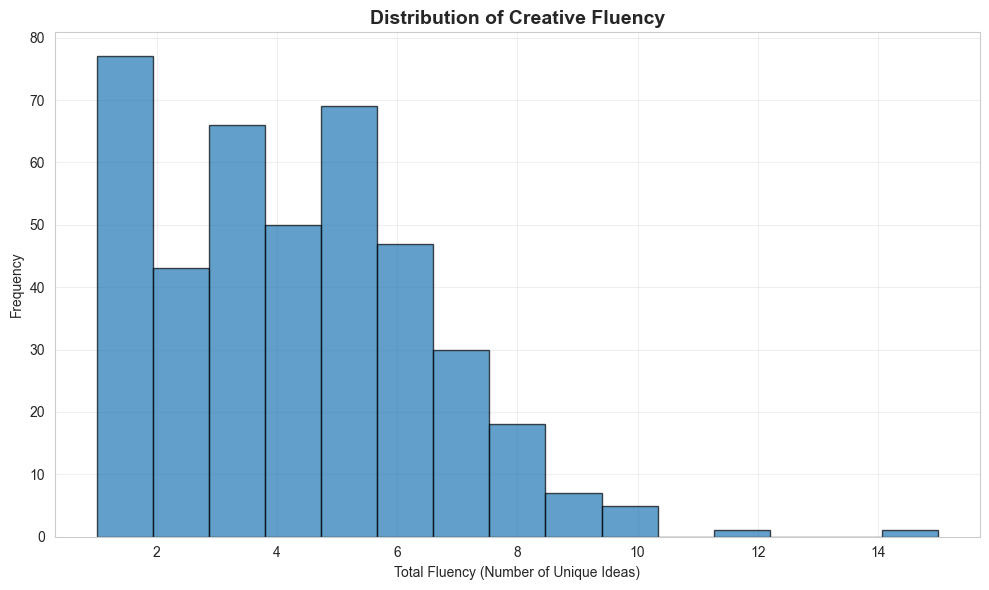


Fluency categories:
fluency_category
Low (1-3)          186
Medium (4-6)       166
High (7-10)         60
Very High (11+)      2
Name: count, dtype: int64


In [33]:
creative_data = df[df['total_fluency'].notna()].copy()

if len(creative_data) > 0:
    print(f"Creative tests: {len(creative_data)} ({len(creative_data)/len(df)*100:.1f}% of surveys)")
    
    print("\nSummary statistics:")
    print(creative_data['total_fluency'].describe().round(2))
    
    fig, ax = plt.subplots(figsize=(10, 6))
    creative_data['total_fluency'].hist(bins=15, edgecolor='black', alpha=0.7)
    ax.set_title('Distribution of Creative Fluency', fontsize=14, fontweight='bold')
    ax.set_xlabel('Total Fluency (Number of Unique Ideas)')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    creative_data['fluency_category'] = pd.cut(
        creative_data['total_fluency'],
        bins=[0, 3, 6, 10, 20],
        labels=['Low (1-3)', 'Medium (4-6)', 'High (7-10)', 'Very High (11+)']
    )
    print("\nFluency categories:")
    print(creative_data['fluency_category'].value_counts().sort_index())

#### Cognitive Performance vs Air Quality
Analyze how air quality affects cognitive performance

Rows with cognitive and air quality data: 375


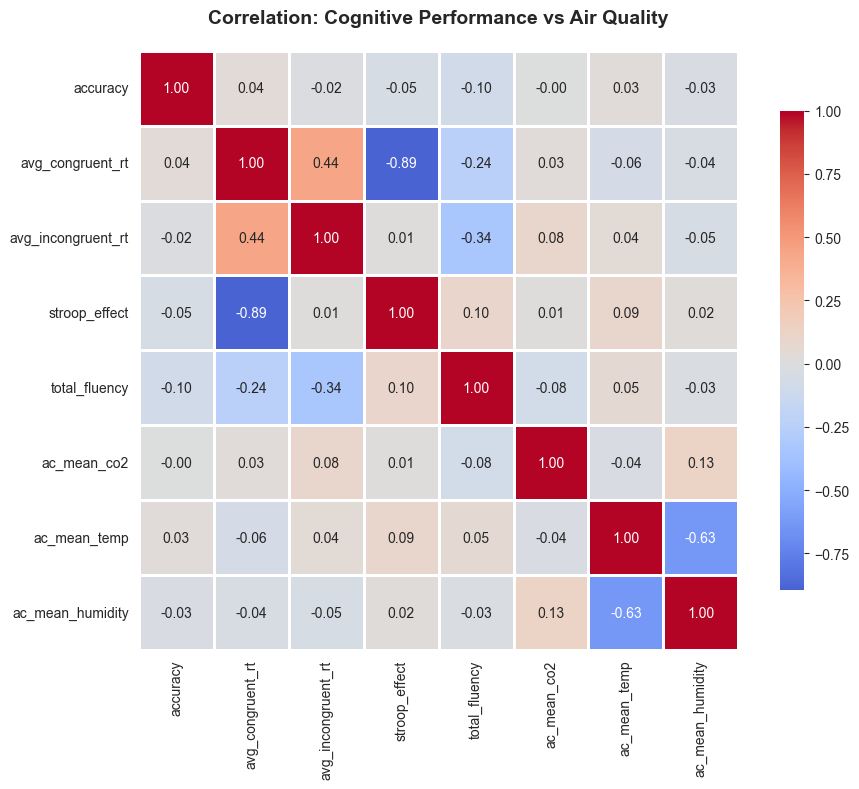


Top correlations (> 0.15):
avg_congruent_rt ↔ avg_incongruent_rt: 0.438
avg_congruent_rt ↔ stroop_effect: -0.895
avg_congruent_rt ↔ total_fluency: -0.243
avg_incongruent_rt ↔ total_fluency: -0.337
ac_mean_temp ↔ ac_mean_humidity: -0.634


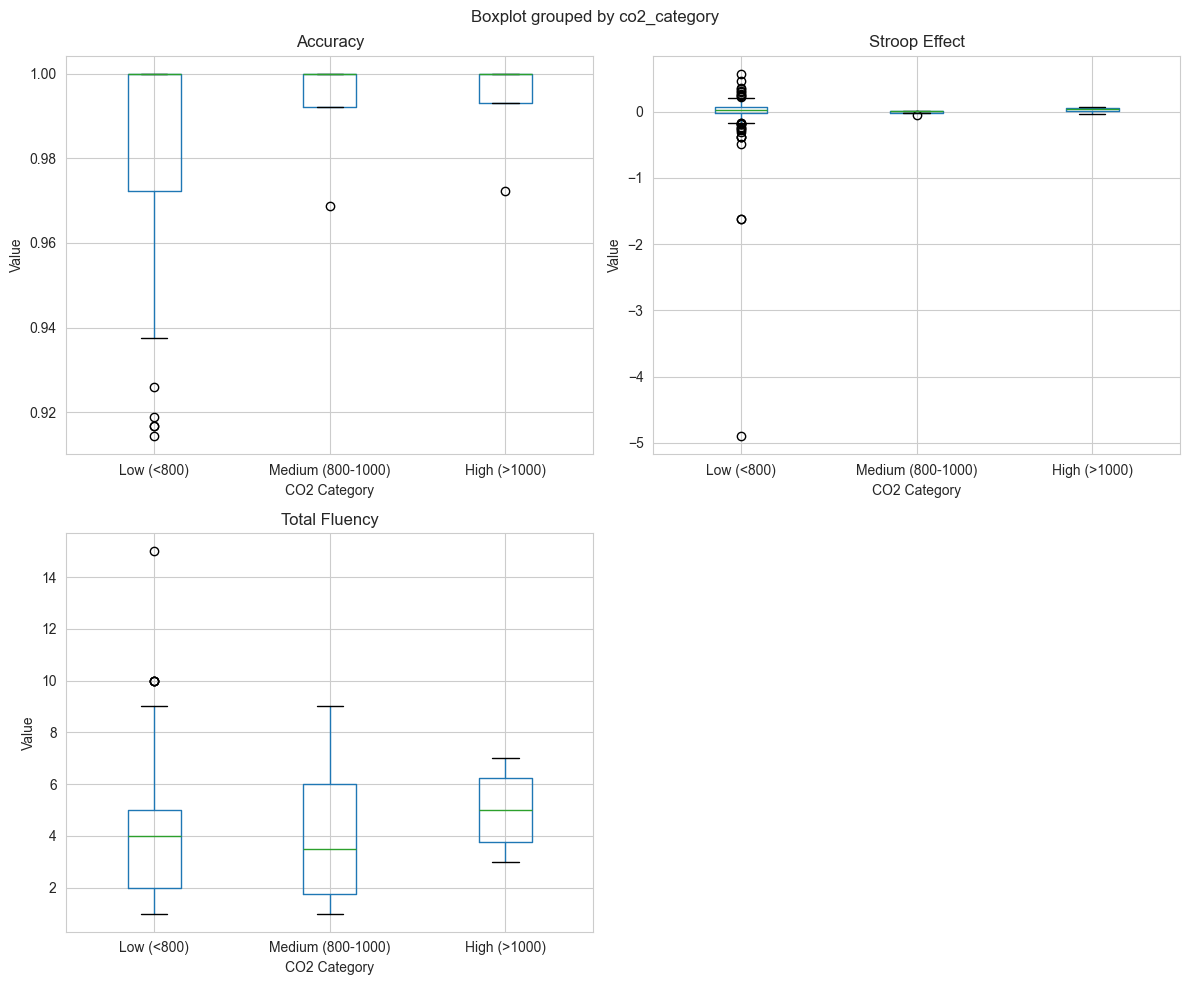


Mean performance by CO2 level:
                   accuracy  stroop_effect  total_fluency
co2_category                                             
Low (<800)            0.989          0.000          4.031
Medium (800-1000)     0.992         -0.005          4.250
High (>1000)          0.993          0.030          5.000


In [34]:
cognitive_air = df[
    (df['accuracy'].notna()) & 
    (df['ac_mean_co2'].notna())
].copy()

if len(cognitive_air) > 0:
    print(f"Rows with cognitive and air quality data: {len(cognitive_air)}")
    
    corr_vars = ['accuracy', 'avg_congruent_rt', 'avg_incongruent_rt', 'stroop_effect', 'total_fluency',
                 'ac_mean_co2', 'ac_mean_temp', 'ac_mean_humidity']
    corr_vars = [col for col in corr_vars if col in cognitive_air.columns]
    corr_data = cognitive_air[corr_vars].dropna()
    
    if len(corr_data) > 0:
        corr_matrix = corr_data.corr()
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                    center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
        plt.title('Correlation: Cognitive Performance vs Air Quality', 
                  fontsize=14, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()
        
        print("\nTop correlations (> 0.15):")
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                val = corr_matrix.iloc[i, j]
                if abs(val) > 0.15:
                    print(f"{corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: {val:.3f}")
    
    cognitive_air['co2_category'] = pd.cut(
        cognitive_air['ac_mean_co2'],
        bins=[0, 800, 1000, 2000],
        labels=['Low (<800)', 'Medium (800-1000)', 'High (>1000)']
    )
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Cognitive Performance by CO2 Level', fontsize=14, fontweight='bold')
    
    cognitive_vars = ['accuracy', 'stroop_effect', 'total_fluency']
    for idx, var in enumerate(cognitive_vars):
        row = idx // 2
        col = idx % 2
        cognitive_air.boxplot(column=var, by='co2_category', ax=axes[row, col], grid=True)
        axes[row, col].set_title(var.replace('_', ' ').title())
        axes[row, col].set_xlabel('CO2 Category')
        axes[row, col].set_ylabel('Value')
    
    axes[1, 1].remove()
    plt.tight_layout()
    plt.show()
    
    print("\nMean performance by CO2 level:")
    print(cognitive_air.groupby('co2_category')[cognitive_vars].mean().round(3))

#### Cognitive Performance vs Survey Responses
Analyze relationships between cognitive tests and well-being

Rows with cognitive and survey data: 435


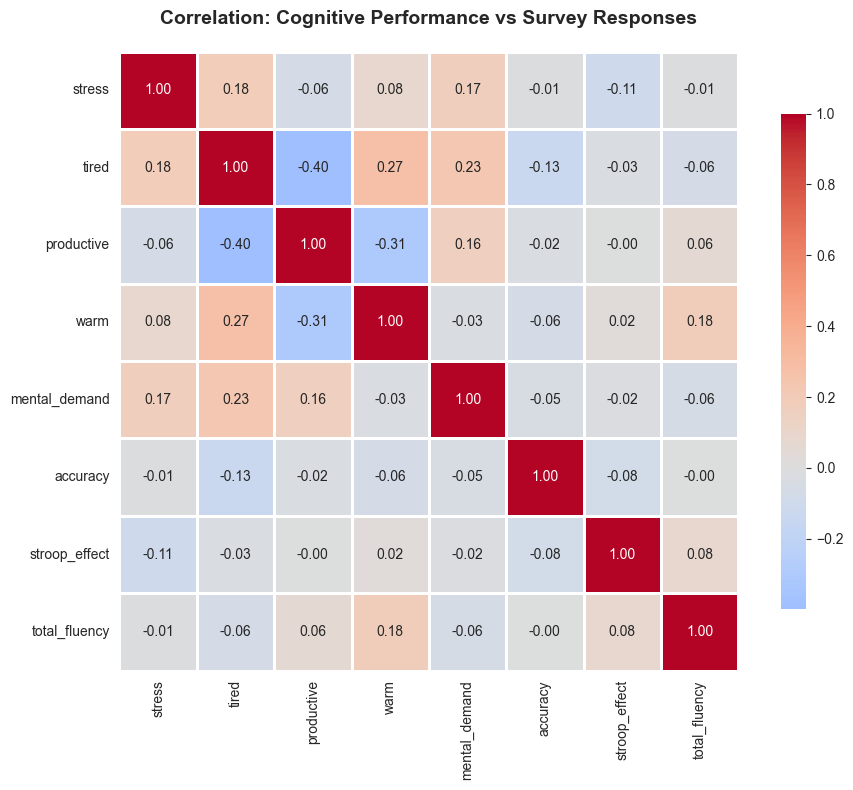


Top correlations (> 0.15):
stress ↔ tired: 0.184
stress ↔ mental_demand: 0.167
tired ↔ productive: -0.398
tired ↔ warm: 0.275
tired ↔ mental_demand: 0.227
productive ↔ warm: -0.307
productive ↔ mental_demand: 0.164
warm ↔ total_fluency: 0.175


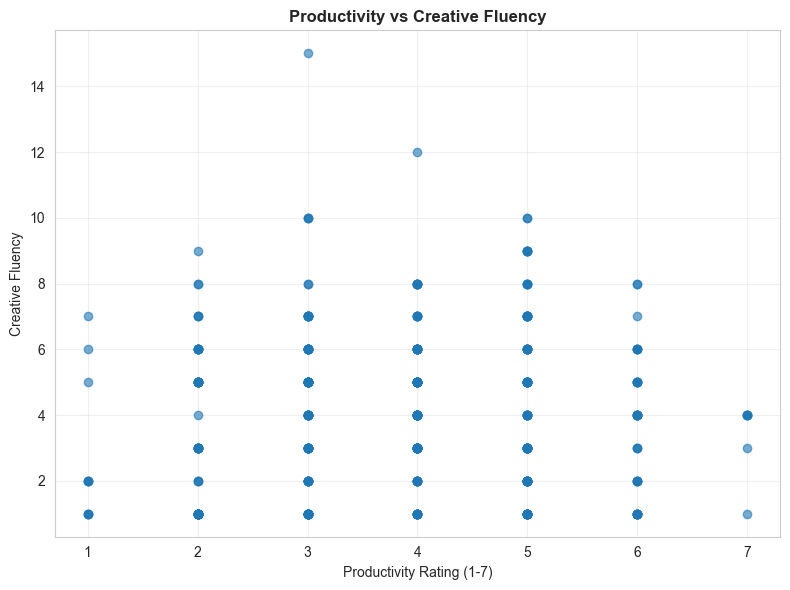


Productivity vs Creative Fluency correlation: 0.065


In [35]:
cognitive_survey = df[
    (df['accuracy'].notna()) | (df['total_fluency'].notna())
].copy()

if len(cognitive_survey) > 0:
    print(f"Rows with cognitive and survey data: {len(cognitive_survey)}")
    
    corr_vars = ['stress', 'tired', 'productive', 'warm', 'mental_demand',
                 'accuracy', 'stroop_effect', 'total_fluency']
    corr_vars = [col for col in corr_vars if col in cognitive_survey.columns]
    corr_data = cognitive_survey[corr_vars].dropna()
    
    if len(corr_data) > 0:
        corr_matrix = corr_data.corr()
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                    center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
        plt.title('Correlation: Cognitive Performance vs Survey Responses', 
                  fontsize=14, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()
        
        print("\nTop correlations (> 0.15):")
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                val = corr_matrix.iloc[i, j]
                if abs(val) > 0.15:
                    print(f"{corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: {val:.3f}")
    
    prod_creative = cognitive_survey[['productive', 'total_fluency']].dropna()
    if len(prod_creative) > 0:
        plt.figure(figsize=(8, 6))
        plt.scatter(prod_creative['productive'], prod_creative['total_fluency'], alpha=0.6)
        plt.xlabel('Productivity Rating (1-7)')
        plt.ylabel('Creative Fluency')
        plt.title('Productivity vs Creative Fluency', fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        corr = prod_creative['productive'].corr(prod_creative['total_fluency'])
        print(f"\nProductivity vs Creative Fluency correlation: {corr:.3f}")

#### Complete Data Analysis
Analysis using rows with all data types (air quality + cognitive + survey)

Complete data: 358 rows (50.2% of surveys)

Summary statistics:
       stress   tired  productive  ac_mean_co2  accuracy  stroop_effect  \
count  358.00  358.00      358.00       358.00    358.00         358.00   
mean     3.32    3.74        3.88       502.64      0.99           0.00   
std      1.38    1.58        1.38       126.35      0.02           0.31   
min      1.00    1.00        1.00       380.96      0.91          -4.90   
25%      2.00    2.00        3.00       428.60      0.97          -0.02   
50%      3.00    4.00        4.00       461.95      1.00           0.02   
75%      5.00    5.00        5.00       535.60      1.00           0.07   
max      7.00    7.00        7.00      1756.23      1.00           0.57   

       total_fluency  
count         358.00  
mean            4.04  
std             2.28  
min             1.00  
25%             2.00  
50%             4.00  
75%             5.00  
max            15.00  


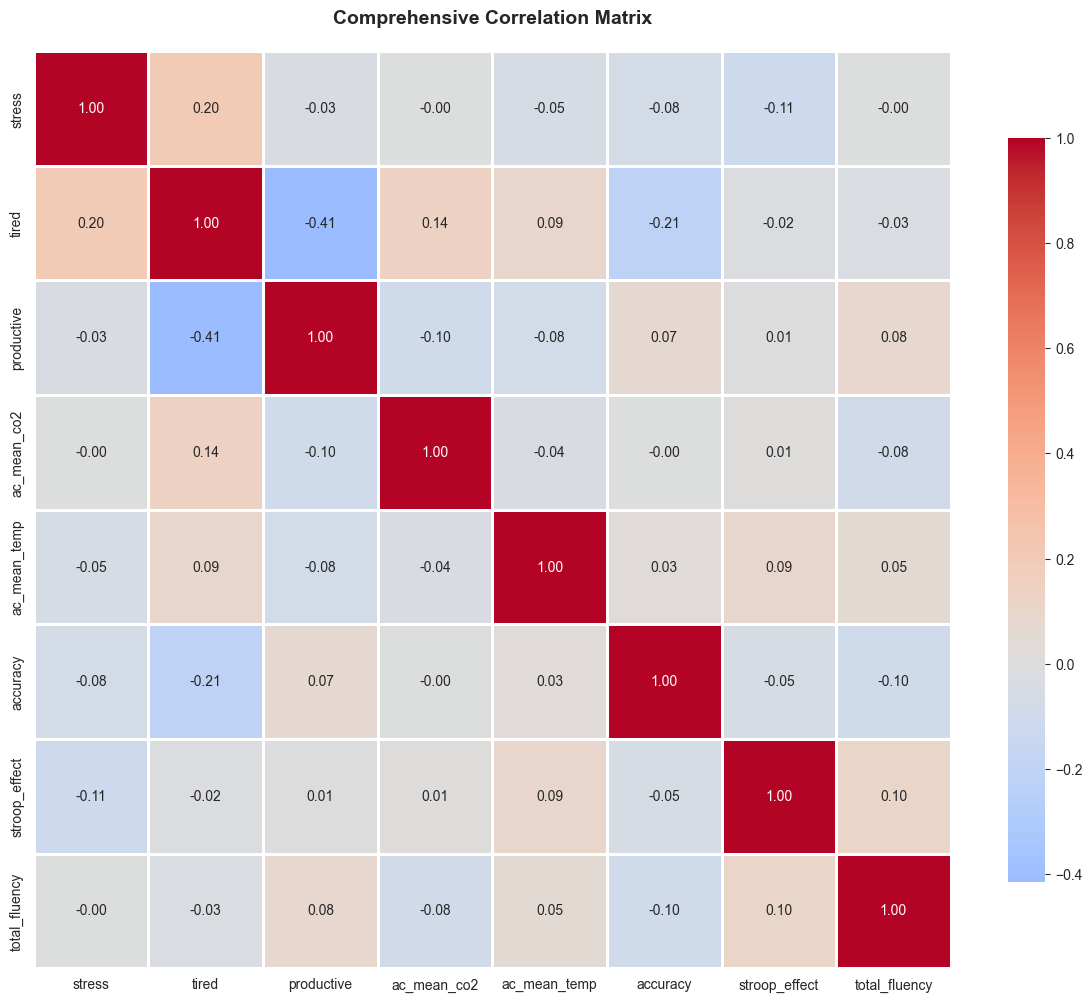

In [36]:
complete_data = df[
    (df['ac_mean_co2'].notna()) & 
    (df['accuracy'].notna()) & 
    (df['total_fluency'].notna())
].copy()

if len(complete_data) > 0:
    print(f"Complete data: {len(complete_data)} rows ({len(complete_data)/len(df)*100:.1f}% of surveys)")
    
    summary_vars = ['stress', 'tired', 'productive', 'ac_mean_co2', 
                    'accuracy', 'stroop_effect', 'total_fluency']
    summary_vars = [col for col in summary_vars if col in complete_data.columns]
    print("\nSummary statistics:")
    print(complete_data[summary_vars].describe().round(2))
    
    all_vars = ['stress', 'tired', 'productive', 'ac_mean_co2', 'ac_mean_temp', 
                'accuracy', 'stroop_effect', 'total_fluency']
    all_vars = [col for col in all_vars if col in complete_data.columns]
    corr_data = complete_data[all_vars].dropna()
    
    if len(corr_data) > 0:
        corr_matrix = corr_data.corr()
        
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                    center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
        plt.title('Comprehensive Correlation Matrix', 
                  fontsize=14, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()

#### Statistical Summary
Key findings and insights from the analysis

In [37]:
print("Statistical Summary")
print("="*60)

print("\nData Overview")
print(f"Observations: {len(df):,}")
print(f"Participants: {df['user_id_clean'].nunique()}")
print(f"Date range: {df['timestamp'].min().date()} to {df['timestamp'].max().date()}")
print(f"AirControl: {(df['ac_mean_co2'].notna()).sum():,} / {len(df):,} ({((df['ac_mean_co2'].notna()).sum()/len(df)*100):.1f}%)")
print(f"Stroop: {(df['accuracy'].notna()).sum():,} / {len(df):,} ({((df['accuracy'].notna()).sum()/len(df)*100):.1f}%)")
print(f"Creative: {(df['total_fluency'].notna()).sum():,} / {len(df):,} ({((df['total_fluency'].notna()).sum()/len(df)*100):.1f}%)")
complete_count = len(df[(df['ac_mean_co2'].notna()) & (df['accuracy'].notna()) & (df['total_fluency'].notna())])
print(f"Complete data: {complete_count:,} / {len(df):,} ({complete_count/len(df)*100:.1f}%)")
print(f"Work: {(df['ac_location_type'] == 'work').sum():,}, Home: {(df['ac_location_type'] == 'home').sum():,}")

survey_cols = ['stress', 'tired', 'productive', 'warm', 'mental_demand']
print("\nSurvey Responses")
print(df[survey_cols].describe().round(2))

air_cols = ['ac_mean_co2', 'ac_mean_temp', 'ac_mean_humidity']
print("\nAir Quality")
print(df[air_cols].describe().round(2))

print("\nCognitive Performance")
stroop_data = df[df['accuracy'].notna()]
creative_data = df[df['total_fluency'].notna()]

if len(stroop_data) > 0:
    print("Stroop Test:")
    print(stroop_data[['accuracy', 'stroop_effect']].describe().round(3))
if len(creative_data) > 0:
    print("\nCreative Fluency:")
    print(creative_data[['total_fluency']].describe().round(2))

cognitive_air = df[(df['accuracy'].notna()) & (df['ac_mean_co2'].notna())]
if len(cognitive_air) > 0:
    print("\nCognitive vs Air Quality:")
    corr_co2_accuracy = cognitive_air['ac_mean_co2'].corr(cognitive_air['accuracy'])
    corr_co2_fluency = cognitive_air['ac_mean_co2'].corr(cognitive_air['total_fluency'])
    if not pd.isna(corr_co2_accuracy):
        print(f"  CO₂ ↔ Accuracy: {corr_co2_accuracy:.3f}")
    if not pd.isna(corr_co2_fluency):
        print(f"  CO₂ ↔ Creative Fluency: {corr_co2_fluency:.3f}")

print("\nWork vs Home")
work = df[df['ac_location_type'] == 'work']
home = df[df['ac_location_type'] == 'home']

if len(work) > 0 and len(home) > 0:
    print(f"Stress: Work {work['stress'].mean():.2f} vs Home {home['stress'].mean():.2f}")
    print(f"CO₂: Work {work['ac_mean_co2'].mean():.1f} ppm vs Home {home['ac_mean_co2'].mean():.1f} ppm")
    print(f"Temp: Work {work['ac_mean_temp'].mean():.1f}°C vs Home {home['ac_mean_temp'].mean():.1f}°C")
    print(f"Humidity: Work {work['ac_mean_humidity'].mean():.1f}% vs Home {home['ac_mean_humidity'].mean():.1f}%")

co2_data = df[df['ac_mean_co2'].notna()].copy()
co2_data['co2_category'] = pd.cut(co2_data['ac_mean_co2'], 
                                   bins=[0, 800, 1000, 2000],
                                   labels=['Low (<800)', 'Medium (800-1000)', 'High (>1000)'])

print("\nCO₂ Threshold Analysis")
print("Observations:")
print(co2_data['co2_category'].value_counts())

print("\nAverage responses by CO₂ level:")
co2_means = co2_data.groupby('co2_category')[survey_cols].mean()
print(co2_means.round(2))

cognitive_co2 = df[(df['ac_mean_co2'].notna()) & (df['accuracy'].notna())]
if len(cognitive_co2) > 0:
    cognitive_co2['co2_category'] = pd.cut(
        cognitive_co2['ac_mean_co2'],
        bins=[0, 800, 1000, 2000],
        labels=['Low (<800)', 'Medium (800-1000)', 'High (>1000)']
    )
    print("\nCognitive performance by CO₂ level:")
    cog_means = cognitive_co2.groupby('co2_category')[['accuracy', 'stroop_effect', 'total_fluency']].mean()
    print(cog_means.round(3))

df['hour'] = df['timestamp'].dt.hour
hourly_co2 = df.groupby('hour')['ac_mean_co2'].mean()
hourly_stress = df.groupby('hour')['stress'].mean()

print("\nTemporal Patterns")
print(f"Peak CO₂: Hour {hourly_co2.idxmax()} ({hourly_co2.max():.1f} ppm)")
print(f"Peak stress: Hour {hourly_stress.idxmax()} ({hourly_stress.max():.2f})")

if len(stroop_data) > 0:
    print("\nCognitive Performance:")
    print(f"• Stroop tests: {len(stroop_data)} ({len(stroop_data)/len(df)*100:.1f}%)")
    print(f"• Mean accuracy: {stroop_data['accuracy'].mean():.3f}")
    print(f"• Mean Stroop effect: {stroop_data['stroop_effect'].mean():.3f}")

if len(creative_data) > 0:
    print(f"• Creative tests: {len(creative_data)} ({len(creative_data)/len(df)*100:.1f}%)")
    print(f"• Mean fluency: {creative_data['total_fluency'].mean():.2f}")

complete_data = df[(df['ac_mean_co2'].notna()) & (df['accuracy'].notna()) & (df['total_fluency'].notna())]
if len(complete_data) > 0:
    print(f"\nComprehensive Analysis:")
    print(f"• Complete data: {len(complete_data)} rows ({len(complete_data)/len(df)*100:.1f}%)")
    print("• Enables analysis of air quality impact on cognitive performance")

Statistical Summary

Data Overview
Observations: 713
Participants: 22
Date range: 2025-06-29 to 2025-07-15
AirControl: 627 / 713 (87.9%)
Stroop: 429 / 713 (60.2%)
Creative: 414 / 713 (58.1%)
Complete data: 358 / 713 (50.2%)
Work: 368, Home: 259

Survey Responses
       stress   tired  productive    warm  mental_demand
count  713.00  713.00      713.00  713.00         713.00
mean     3.38    3.71        3.90    3.58           3.86
std      1.33    1.50        1.32    1.86           1.49
min      1.00    1.00        1.00    1.00           1.00
25%      2.00    3.00        3.00    2.00           3.00
50%      3.00    4.00        4.00    4.00           4.00
75%      5.00    5.00        5.00    5.00           5.00
max      7.00    7.00        7.00    7.00           7.00

Air Quality
       ac_mean_co2  ac_mean_temp  ac_mean_humidity
count       627.00        627.00            627.00
mean        500.55         27.00             30.71
std         115.17          2.13              6.48
min    

#### Save Results
Export key findings and data summaries

In [38]:
results_dir = script_dir.parent / 'results'
results_dir.mkdir(exist_ok=True)

survey_cols = ['stress', 'tired', 'productive', 'warm', 'mental_demand']
air_cols = ['ac_mean_co2', 'ac_mean_temp', 'ac_mean_humidity']

survey_stats = df[survey_cols].describe()
air_stats = df[air_cols].describe()

survey_stats.to_csv(results_dir / 'survey_statistics.csv')
air_stats.to_csv(results_dir / 'air_quality_statistics.csv')

stroop_data = df[df['accuracy'].notna()]
creative_data = df[df['total_fluency'].notna()]

if len(stroop_data) > 0:
    stroop_stats = stroop_data[['accuracy', 'avg_congruent_rt', 'avg_incongruent_rt', 'stroop_effect']].describe()
    stroop_stats.to_csv(results_dir / 'stroop_statistics.csv')

if len(creative_data) > 0:
    creative_stats = creative_data[['total_fluency']].describe()
    creative_stats.to_csv(results_dir / 'creative_statistics.csv')

corr_vars = survey_cols + air_cols
corr_vars = [col for col in corr_vars if col in df.columns]
corr_data = df[corr_vars].dropna()

if len(corr_data) > 0:
    corr_matrix = corr_data.corr()
    corr_matrix.to_csv(results_dir / 'correlation_matrix.csv')

cognitive_air = df[(df['accuracy'].notna()) & (df['ac_mean_co2'].notna())]
if len(cognitive_air) > 0:
    cog_air_vars = ['accuracy', 'stroop_effect', 'total_fluency', 'ac_mean_co2', 'ac_mean_temp', 'ac_mean_humidity']
    cog_air_vars = [col for col in cog_air_vars if col in cognitive_air.columns]
    cog_air_corr = cognitive_air[cog_air_vars].corr()
    cog_air_corr.to_csv(results_dir / 'cognitive_air_quality_correlation.csv')

work = df[df['ac_location_type'] == 'work']
home = df[df['ac_location_type'] == 'home']

if len(work) > 0 and len(home) > 0:
    comparison = pd.DataFrame({
        'Work': [work['stress'].mean(), work['tired'].mean(), work['productive'].mean(),
                 work['ac_mean_co2'].mean(), work['ac_mean_temp'].mean(), work['ac_mean_humidity'].mean()],
        'Home': [home['stress'].mean(), home['tired'].mean(), home['productive'].mean(),
                 home['ac_mean_co2'].mean(), home['ac_mean_temp'].mean(), home['ac_mean_humidity'].mean()]
    }, index=['Stress', 'Tired', 'Productive', 'CO2', 'Temperature', 'Humidity'])
    
    comparison.to_csv(results_dir / 'work_vs_home_comparison.csv')

co2_data = df[df['ac_mean_co2'].notna()].copy()
co2_data['co2_category'] = pd.cut(co2_data['ac_mean_co2'], 
                                   bins=[0, 800, 1000, 2000],
                                   labels=['Low (<800)', 'Medium (800-1000)', 'High (>1000)'])

co2_means = co2_data.groupby('co2_category')[survey_cols].mean()
co2_means.to_csv(results_dir / 'co2_threshold_analysis.csv')

cognitive_co2 = df[(df['ac_mean_co2'].notna()) & (df['accuracy'].notna())]
if len(cognitive_co2) > 0:
    cognitive_co2['co2_category'] = pd.cut(
        cognitive_co2['ac_mean_co2'],
        bins=[0, 800, 1000, 2000],
        labels=['Low (<800)', 'Medium (800-1000)', 'High (>1000)']
    )
    cog_co2_means = cognitive_co2.groupby('co2_category')[['accuracy', 'stroop_effect', 'total_fluency']].mean()
    cog_co2_means.to_csv(results_dir / 'cognitive_performance_by_co2.csv')

print(f"Results saved to: {results_dir}")

Results saved to: /Users/khasrurrahman/Desktop/Interdisciplinary Project/scripts/results
